In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Bloodhound\Downloads\Github\DataScience-AI-ML\500_Person_Gender_Height_Weight_Index\500_Person_Gender_Height_Weight_Index.csv")
print(df.to_string())

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
5      Male     189     104      3
6      Male     147      92      5
7      Male     154     111      5
8      Male     174      90      3
9    Female     169     103      4
10     Male     195      81      2
11   Female     159      80      4
12   Female     192     101      3
13     Male     155      51      2
14     Male     191      79      2
15   Female     153     107      5
16   Female     157     110      5
17     Male     140     129      5
18     Male     144     145      5
19     Male     172     139      5
20     Male     157     110      5
21   Female     153     149      5
22   Female     169      97      4
23     Male     185     139      5
24   Female     172      67      2
25   Female     151      64      3
26     Male     190      95      3
27     Male     187 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [5]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
#Feature and Label Selection

group_by_index = df.groupby('Index')['Gender'].value_counts()
print(group_by_index)

Index  Gender
0      Female      7
       Male        6
1      Male       15
       Female      7
2      Female     41
       Male       28
3      Female     36
       Male       32
4      Female     71
       Male       59
5      Male      105
       Female     93
Name: count, dtype: int64


In [9]:
#Normalise the features

scaler = MinMaxScaler()
df[['Height', 'Weight','Index']] = scaler.fit_transform(df[['Height', 'Weight','Index']])
print(df.head(10))

   Gender    Height    Weight  Index
0    Male  0.576271  0.418182    0.8
1    Male  0.830508  0.336364    0.4
2  Female  0.762712  0.545455    0.8
3  Female  0.932203  0.490909    0.6
4    Male  0.152542  0.100000    0.6
5    Male  0.830508  0.490909    0.6
6    Male  0.118644  0.381818    1.0
7    Male  0.237288  0.554545    1.0
8    Male  0.576271  0.363636    0.6
9  Female  0.491525  0.481818    0.8


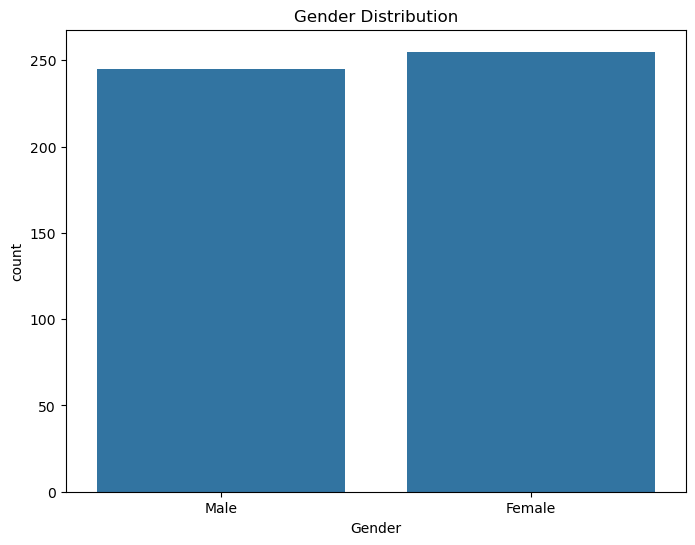

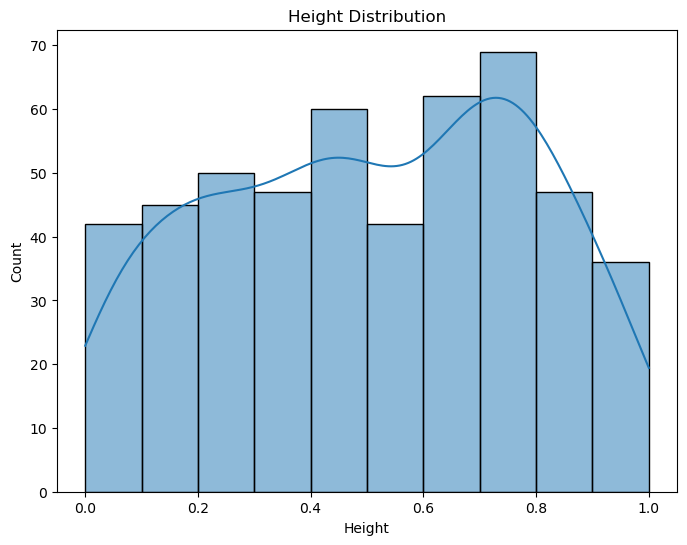

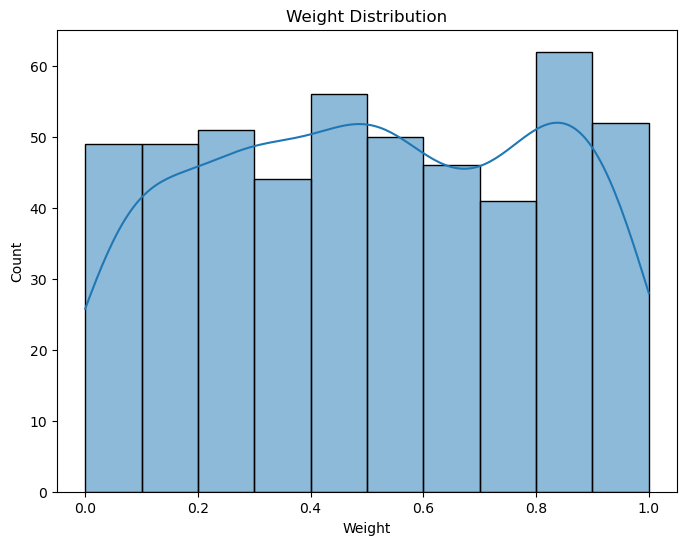

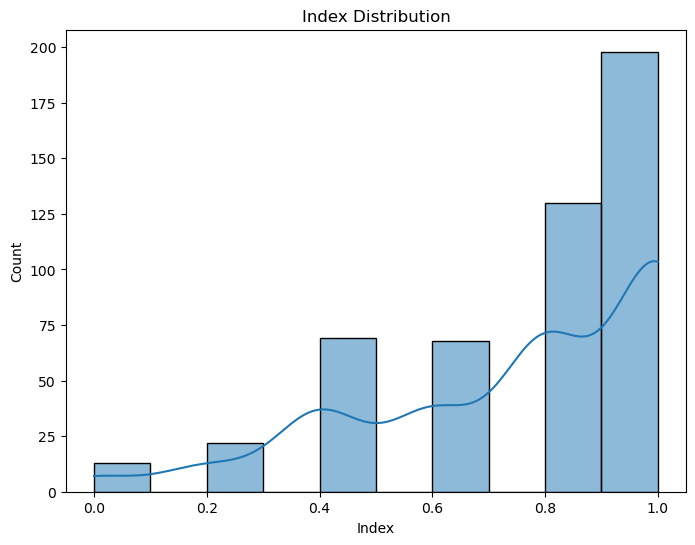

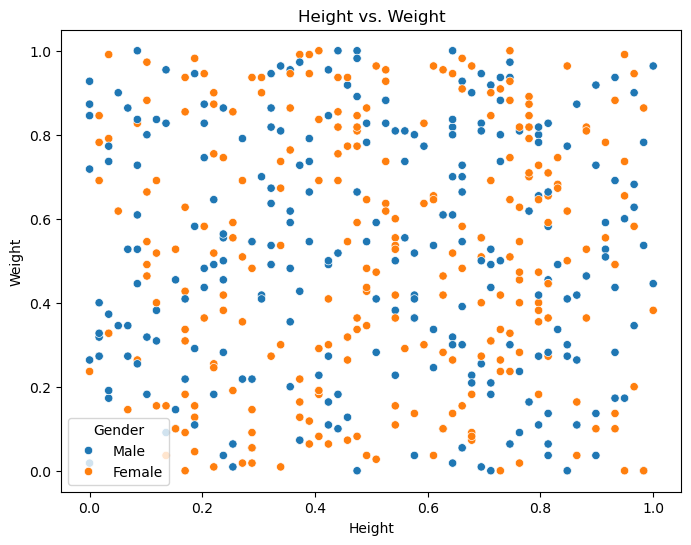

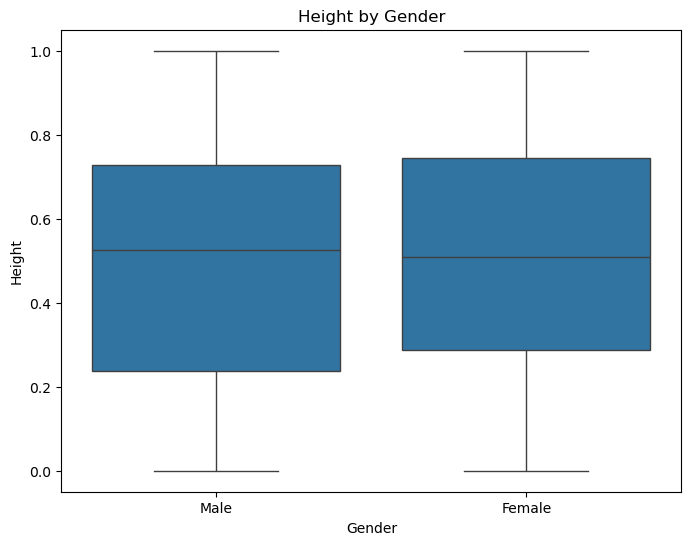

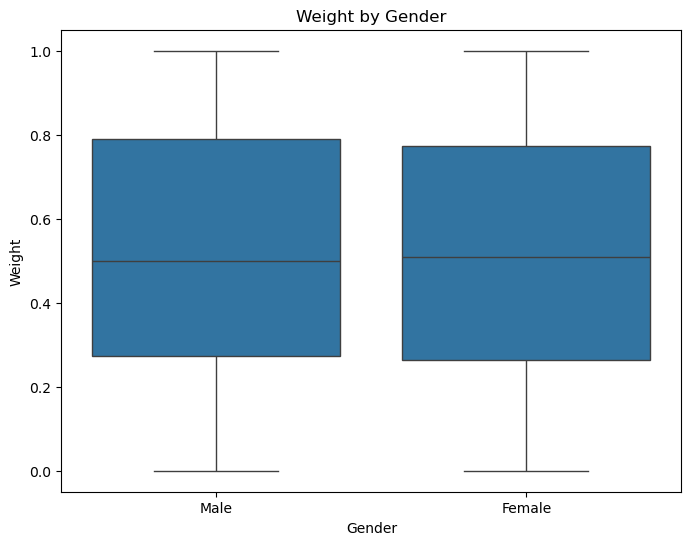

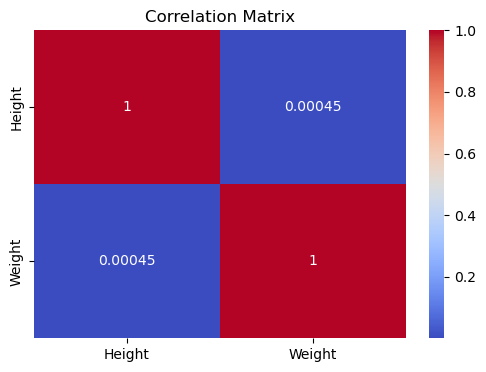

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['Index'], kde=True)
plt.title('Index Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df)
plt.title('Height vs. Weight')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Height', data=df)
plt.title('Height by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Weight', data=df)
plt.title('Weight by Gender')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['Height', 'Weight']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X = df[['Height', 'Weight', 'Index']]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 3)
y_train shape: (400,)
X_test shape: (100, 3)
y_test shape: (100,)


In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

Accuracy of the KNN classifier: 0.45
              precision    recall  f1-score   support

      Female       0.50      0.44      0.47        55
        Male       0.40      0.47      0.43        45

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.46      0.45      0.45       100



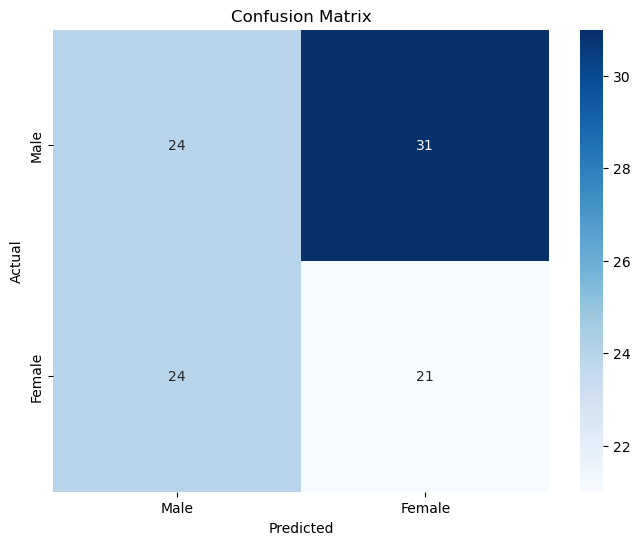

In [15]:
#Best Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()